# PRODUCTO GRILLADO PISCO V2p1 estable
___

<img src="..\\Images\\img_pisco.png" alt="Girl in a jacket" style="width:700px;height:400px;">

In [4]:
import xarray as xr
import datetime
%matplotlib inline

In [5]:
pwd

'M:\\python-geociencias-master\\Aplicaciones'

## Leyendo datos PISCO

In [6]:
# reading from opendap
# http://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Prec/.v2p1/.stable/.monthly/
Piscopm = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Prec/.v2p1/.stable/.monthly/.Prec/dods',decode_times=False)
Piscopm

<xarray.Dataset>
Dimensions:  (T: 432, X: 133, Y: 198)
Coordinates:
  * Y        (Y) float32 0.95 0.84999996 0.75 0.65 ... -18.55 -18.65 -18.75
  * X        (X) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
  * T        (T) float32 252.5 253.5 254.5 255.5 ... 680.5 681.5 682.5 683.5
Data variables:
    Prec     (T, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

In [7]:
# 'M:\\data_PISCO\\merge_pisco\\PiscoV2p1_stable_monthly_start.nc'
# Piscopm = xr.open_dataset('../Data/PiscoV2p1_stable_monthly.nc',decode_times=False)
# Piscopm

In [8]:
# Por un demonio! el tiempo
Piscopm.T

<xarray.DataArray 'T' (T: 432)>
array([252.5, 253.5, 254.5, ..., 681.5, 682.5, 683.5], dtype=float32)
Coordinates:
  * T        (T) float32 252.5 253.5 254.5 255.5 ... 680.5 681.5 682.5 683.5
Attributes:
    calendar:       360
    standard_name:  time
    pointwidth:     1.0
    gridtype:       0
    units:          months since 1960-01-01

### Convirtiendo tiempo al tiempo estandar cf

In [9]:
Piscopm.T.attrs['calendar'] = '360_day'
# Ahora le decimos a xarray que interprete los tiempos
Piscopm_cf = xr.decode_cf(Piscopm)
Piscopm_cf

<xarray.Dataset>
Dimensions:  (T: 432, X: 133, Y: 198)
Coordinates:
  * Y        (Y) float32 0.95 0.84999996 0.75 0.65 ... -18.55 -18.65 -18.75
  * X        (X) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
  * T        (T) object 1981-01-16 00:00:00 ... 2016-12-16 00:00:00
Data variables:
    Prec     (T, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

### Convirtiendo tiempo cf a formato fecha de datetime para ser leido por pandas

In [10]:
Piscopm_cf['T'] = Piscopm_cf.indexes['T'].shift(-15,'D').to_datetimeindex()
Piscopm_cf['T']

C:\Users\manuel\Anaconda3\envs\pangeo\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  """Entry point for launching an IPython kernel.


<xarray.DataArray 'T' (T: 432)>
array(['1981-01-01T00:00:00.000000000', '1981-02-01T00:00:00.000000000',
       '1981-03-01T00:00:00.000000000', ..., '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * T        (T) datetime64[ns] 1981-01-01 1981-02-01 ... 2016-11-01 2016-12-01

### Renombrando variables al estandar

In [11]:
Piscopm_cf = Piscopm_cf.rename({'X':'lon','Y':'lat','T':'time'})
Piscopm_cf

<xarray.Dataset>
Dimensions:  (lat: 198, lon: 133, time: 432)
Coordinates:
  * lat      (lat) float32 0.95 0.84999996 0.75 0.65 ... -18.55 -18.65 -18.75
  * lon      (lon) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2016-12-01
Data variables:
    Prec     (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

## Jugando con los datos Pisco 1981 to 2010

In [12]:
date_clim_ini= datetime.datetime(1981,1,1)
# date_clim_ini= '1981-01-01'
date_clim_fin= datetime.datetime(2010,12,31)
# date_clim_fin= '2010-12-31'

#lat_n= 0.95; lat_s= -18.75; lon_w= -81.25; lon_e= -68.05

#Pisco_clim = Piscopm_cf.Prec.sel(time= slice(date_clim_ini, date_clim_fin).groupby('time.month').mean(dim='time')
Pisco_clim = Piscopm_cf.Prec.sel(time= slice(date_clim_ini.strftime('%Y-%m-%d'), date_clim_fin.strftime('%Y-%m-%d'))).groupby('time.month').mean(dim='time')

C:\Users\manuel\Anaconda3\envs\pangeo\lib\site-packages\xarray\core\nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### Algunas vistas del mes de Enero con xarray 

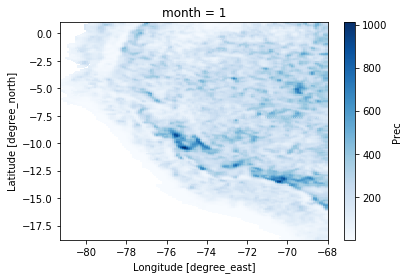

In [13]:
# dando un primera vista a la climatologia del mes de Enero
data = Pisco_clim.sel(month=1)
data.plot(cmap='Blues') #cmap='RdBu'

In [14]:
data

<xarray.DataArray 'Prec' (lat: 198, lon: 133)>
array([[       nan,        nan,        nan, ..., 254.43633 , 186.50539 ,
        181.91478 ],
       [       nan,        nan,        nan, ..., 279.18344 , 218.8042  ,
        212.44199 ],
       [       nan,        nan,        nan, ..., 316.52478 , 265.3937  ,
        242.38524 ],
       ...,
       [       nan,        nan,        nan, ..., 103.56469 , 103.4132  ,
        104.187935],
       [       nan,        nan,        nan, ..., 109.353676, 109.11712 ,
        102.51998 ],
       [       nan,        nan,        nan, ..., 100.39052 ,  92.535904,
         86.249115]], dtype=float32)
Coordinates:
  * lat      (lat) float32 0.95 0.84999996 0.75 0.65 ... -18.55 -18.65 -18.75
  * lon      (lon) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
    month    int64 1

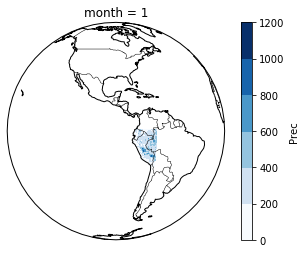

In [15]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeat

#Geostationary(central_longitude=0.0, satellite_height=35785831, false_easting=0, false_northing=0, globe=None, sweep_axis='y')[source]
ax=plt.axes(projection= ccrs.Orthographic(central_longitude=-90))
# ax=plt.axes(projection= ccrs.Geostationary(central_longitude=-80))
data.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues')
ax.set_global(); ax.coastlines();
ax.add_feature(cfeat.BORDERS, linestyle='-', linewidth=0.5)

#### Utilizando el codigo clases de FuncionesObjetos 

In [16]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

class Peru_plot:
    def __init__(self,
                 lon,
                 lat,
                 data,
                 proj=ccrs.PlateCarree(central_longitude=180),
                 trans=ccrs.PlateCarree(),
                ):
        self.data = data
        self.lon = lon
        self.lat = lat
        self.proj = proj
        self.trans = trans
        self.setup_canvas()
    
    def format_latlon(self):
        from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

        lon_formatter = LongitudeFormatter()
        lat_formatter = LatitudeFormatter()

        self.ax.set_xticks(np.arange(-180,180,5), crs=ccrs.PlateCarree())
        self.ax.set_yticks(np.arange(-90,90,5), crs=ccrs.PlateCarree())

        self.ax.xaxis.set_major_formatter(lon_formatter)
        self.ax.yaxis.set_major_formatter(lat_formatter)
    
    def setup_canvas(self):
        self.fig, self.ax = plt.subplots(figsize=(12,8),subplot_kw={'projection': self.proj})
    
    def set_extent(self, *args, glob=False, **kwargs):
        if glob:
            self.ax.set_global()
        else:
            self.ax.set_extent(*args, **kwargs)
        
    def plot(self, **kwargs):
        self.ax.pcolormesh(self.lon, self.lat, data, transform=self.trans, **kwargs)
        self.ax.gridlines(linestyle='--')
        

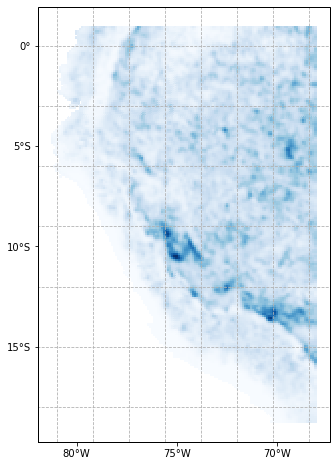

In [17]:
peru_gf = Peru_plot(lon=data.lon, lat=data.lat, data=data)
peru_gf.format_latlon()
peru_gf.plot(cmap='Blues')

Pero aun hay cosas por agregar

In [18]:
pwd

'M:\\python-geociencias-master\\Aplicaciones'

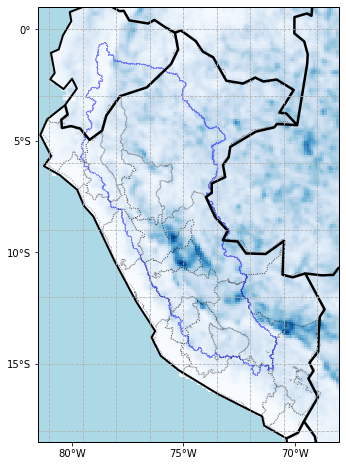

In [19]:
peru_gf = Peru_plot(lon=data.lon, lat=data.lat, data=data)
peru_gf.format_latlon()
#peru_pp.set_extent(glob=True)
# ---------------------------------------------------------------------------------------------------------
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
# WGS 84 / UTM zone 18S (EPSG:32718) to WGS 84 (EPSG:4326)
#fname_dep= 'M:\\data_GIS\\dep_peru\\Base_Regional_rep.shp'
fname_dep= '..\\Data\\shps\\Base_Regional_rep.shp'
shape_feature1 = ShapelyFeature(Reader(fname_dep).geometries(),
                            ccrs.PlateCarree(), edgecolor='k')
peru_gf.ax.add_feature(shape_feature1, facecolor='None', linestyle=':', edgecolor='k', alpha=0.4)
#fname_basin= 'M:\\data_GIS\\shps_amazonbasin\\Tamshiyacu_Amazonas.shp'
fname_basin= '..\\Data\\shps\\Tamshiyacu_Amazonas.shp'
shape_feature2 = ShapelyFeature(Reader(fname_basin).geometries(),
                            ccrs.PlateCarree(), edgecolor='k')
peru_gf.ax.add_feature(shape_feature2, facecolor='None', linestyle=':', edgecolor='b', alpha=0.5)

import cartopy.feature as cfeat
peru_gf.ax.add_feature(cfeat.BORDERS, linestyle='-', linewidth=2.5)
peru_gf.ax.add_feature(cfeat.OCEAN,facecolor='lightblue')

peru_gf.ax.coastlines(color='k', linestyle='-', linewidth=2)
peru_gf.ax.set_extent([-81.5, -68, -18.5, 1 ], crs=ccrs.PlateCarree())
# ---------------------------------------------------------------------------------------------------------
peru_gf.plot(cmap='Blues')#,vmin=-0, vmax=1200, alpha=0.5)


#### Sumando todo lo anterior a la clase definida y agregando un metodo para incorporar shapes

In [20]:
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
import numpy as np

class Peru_plot2:
    def __init__(self,
                 lon,
                 lat,
                 data,
                 proj=ccrs.PlateCarree(central_longitude=180),
                 trans=ccrs.PlateCarree(),
                ):
        self.data = data
        self.lon = lon
        self.lat = lat
        self.proj = proj
        self.trans = trans
        self.setup_canvas()
    
    def format_latlon(self):
        from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

        lon_formatter = LongitudeFormatter()
        lat_formatter = LatitudeFormatter()

        self.ax.set_xticks(np.arange(-180,180,5), crs=ccrs.PlateCarree())
        self.ax.set_yticks(np.arange(-90,90,5), crs=ccrs.PlateCarree())

        self.ax.xaxis.set_major_formatter(lon_formatter)
        self.ax.yaxis.set_major_formatter(lat_formatter)
        
        self.ax.add_feature(cfeat.BORDERS, linestyle='-', linewidth=2.5)
        self.ax.add_feature(cfeat.OCEAN,facecolor='lightblue')

        self.ax.coastlines(color='k', linestyle='-', linewidth=2)
        self.ax.set_extent([-81.5, -68, -18.5, 1 ], crs=ccrs.PlateCarree())
    
    def setup_canvas(self):
        self.fig, self.ax = plt.subplots(figsize=(12,8),subplot_kw={'projection': self.proj})
        
    def set_poligono(self, file_poligono, edgecolor='k'):
        #fname_dep= 'M:\\data_GIS\\dep_peru\\Base_Regional_rep.shp'
        self.shape_feature = ShapelyFeature(Reader(file_poligono).geometries(), ccrs.PlateCarree(), edgecolor='k')
        self.ax.add_feature(self.shape_feature, facecolor='None', linestyle=':', edgecolor= edgecolor, alpha=0.5)
    
    def set_extent(self, *args, glob=False, **kwargs):
        if glob:
            self.ax.set_global()
        else:
            self.ax.set_extent(*args, **kwargs)
        
    def plot(self, **kwargs):
        self.ax.pcolormesh(self.lon, self.lat, data, transform=self.trans, **kwargs)
        self.ax.gridlines(linestyle='--')
        

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

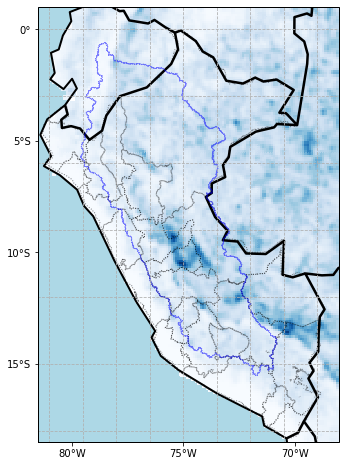

In [21]:
peru_gf = Peru_plot2(lon=data.lon, lat=data.lat, data=data)
peru_gf.format_latlon()
#peru_pp.set_extent(glob=True)
# ---------------------------------------------------------------------------------------------------------
# peru_gf.set_poligono('M:\\data_GIS\\dep_peru\\Base_Regional_rep.shp')
peru_gf.set_poligono('..\\Data\\shps\\Base_Regional_rep.shp')
# peru_gf.set_poligono('M:\\data_GIS\\shps_amazonbasin\\Tamshiyacu_Amazonas.shp', edgecolor='b')
peru_gf.set_poligono('..\\Data\\shps\\Tamshiyacu_Amazonas.shp', edgecolor='b')
# ---------------------------------------------------------------------------------------------------------
# shade = peru_gf.plot(cmap='Blues')#,vmin=-0, vmax=1200, alpha=0.5)
# plt.colorbar(shade)

### Climatologia

#### Xarray

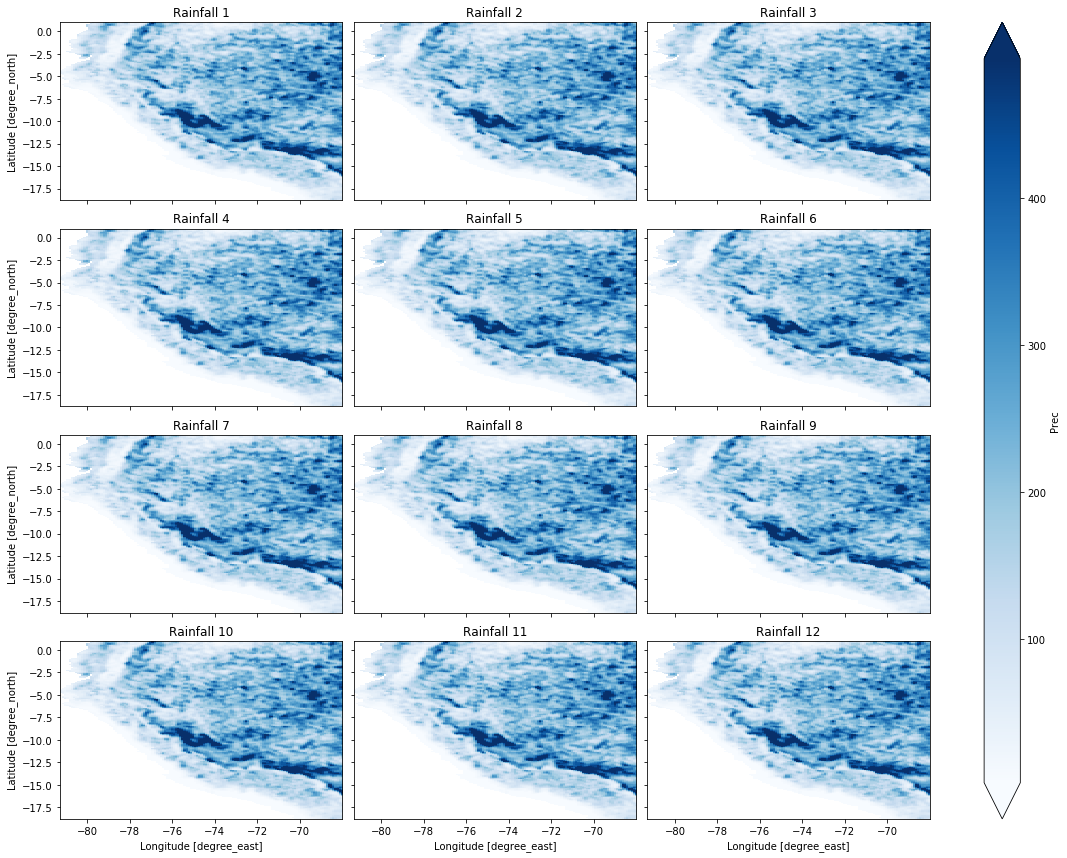

In [22]:
g = Pisco_clim.plot.imshow('lon', 'lat', col='month', col_wrap=3, robust=True, figsize=(16,12), cmap='Blues')

for i, ax in enumerate(g.axes.flat):
    ax.set_title('Rainfall %d' %(i+1))

#### Una mezcla de todo

Text(0.99, 0.18, 'Clim 1981-2010')

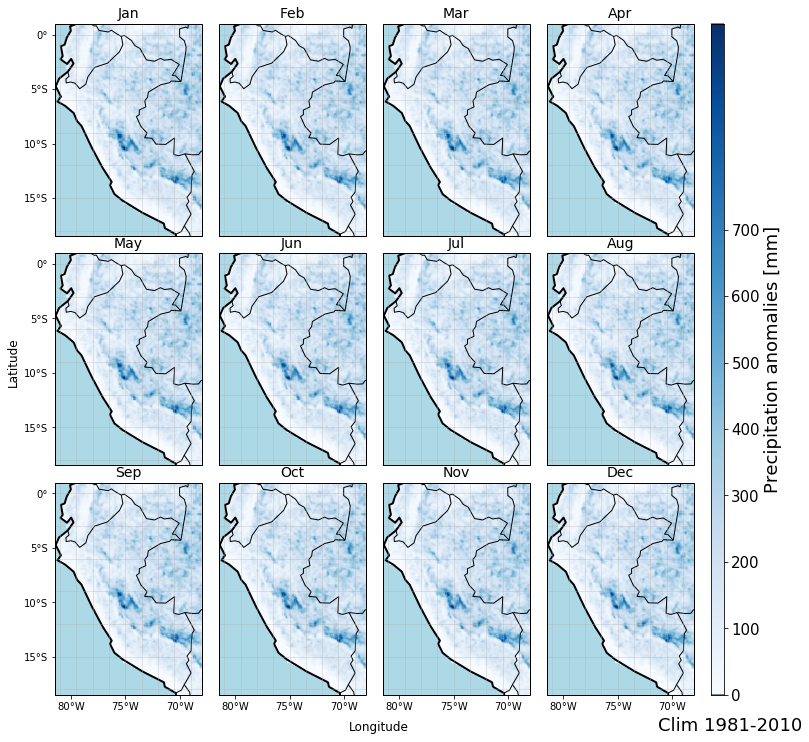

In [23]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid

titles = pd.date_range('2014-01-01','2014-12-31', freq='M').strftime("%b").tolist() 

axes_class = (GeoAxes,dict(map_projection=ccrs.PlateCarree()))

x_figsize, y_figsize = 12, 16
fig = plt.figure(figsize=(x_figsize, y_figsize))

axgr = AxesGrid(fig, 111, axes_class=axes_class,
                    #rect=[left, bottom, width, height] 
                    nrows_ncols=(3,4),                                      ## ndias
                    axes_pad=0.24,
                    # espaciado entre todos los graf
                    cbar_location='right',
                    cbar_mode='single',
                    cbar_pad=None,
                    # separacion de la bar de los demas graficos
                    cbar_size='3%',
                    # grosor de la bar
                    label_mode=''
                    ) 

for i, ax in enumerate(axgr):
    ax.set_title(str(titles[i]), fontsize= 14)
    
    if (i == 0 or i == 4 or i == 8):                                 ## ndias
        ax.set_yticks([-90, -60, -30, -20, -15, -10, -5, 0, 5, 10, 15, 20, 30, 60, 90], minor=False, crs=ccrs.PlateCarree())
        #ax.yticks.set_fontsize(fontsize=14)
        
    if (i == 8 or i == 9 or i == 10 or i == 11):                                         ##ndias
        ax.set_xticks([-180, -90, -80, -75, -70, -60, -40, -30, 0, 30, 60, 90,180], crs=ccrs.PlateCarree())

    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    
    ax.add_feature(cfeat.BORDERS, linestyle='-', linewidth=1)
    ax.add_feature(cfeat.OCEAN,facecolor='lightblue')

    ax.coastlines(color='k', linestyle='-', linewidth=2)
    ax.set_extent([-81.5, -68, -18.5, 1 ], crs=ccrs.PlateCarree())
    ax.gridlines(linestyle='-', alpha=0.4)
    im= Pisco_clim.sel(month= i+1).plot(ax=axgr[i], transform=ccrs.PlateCarree(), add_colorbar=False, add_labels=False, cmap='Blues')
    
cbar = ax.cax.colorbar(im)
cbar = axgr.cbar_axes[0].colorbar(im)
#cbar = axgr.cbar_axes[10].colorbar(im)
cbar.ax.set_yticks(np.arange(0, 800, 100))#[-20, -10, -2.75, 0, 2.75, 10, 20] #np.arange(-20, 20.01, 4))
cbar.ax.set_yticklabels(np.arange(0, 800, 100), fontsize= 15) # '-+ \u03C3' # '-+ 2.75'
var = axgr.cbar_axes[0]
#var = axgr.cbar_axes[0]
axis = var.axis[var.orientation]
axis.label.set_fontsize(18) 
axis.label.set_text("Precipitation anomalies [mm]")


fig.text(0.5, 0.18 , 'Longitude', ha='center', fontsize=12, transform=fig.transFigure) #fontsize=12
fig.text(0.07, 0.5, 'Latitude', va='center', fontsize=12, rotation='vertical', transform=fig.transFigure)
ax.text(0.99, 0.18, "Clim 1981-2010", fontsize=18, horizontalalignment='right', transform=fig.transFigure)

# JUNTANDO PISCO V2p1 estable(1981-2016) e inestable(2017-08.2019)
---

## Guardando la version estable del 1981 al 2016 en un nuevo netcdf con los cambios hechos lineas arriba

In [24]:
Piscopm_cf_start = Piscopm_cf
Piscopm_cf_start.time.encoding['units'] = 'days since 1981-01-01'

# establecer una ruta
new_path = 'M:\\data_PISCO\\merge_pisco\\'
new_file = 'PiscoV2p1_stable_monthly_start.nc'

import os

if not os.path.exists(new_path):
    os.makedirs(new_path)
    print('path creado')
else:
    print('ya tienes este path')    

if not os.path.exists(new_path+new_file):
    Piscopm_cf_start.to_netcdf(path=new_path+new_file)
    print('netcdf creado')
else:
    print('ya tienes este netcdf')

ya tienes este path
ya tienes este netcdf


In [25]:
Piscopm_cf_start.time.encoding

{'units': 'days since 1981-01-01'}

In [26]:
Piscopm_cf_start['time']

<xarray.DataArray 'time' (time: 432)>
array(['1981-01-01T00:00:00.000000000', '1981-02-01T00:00:00.000000000',
       '1981-03-01T00:00:00.000000000', ..., '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2016-12-01

## Guardando la version inestable del 2017 en adelante en un nuevo netcdf

In [27]:
#Piscopm_uns = xr.open_dataset('M:\\data_PISCO\\PISCO\Prec\\V2.1\\unstable\\PiscoV2p1_unstable_monthly.nc', decode_times=False)
Piscopm_uns = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Prec/.v2p1/.unstable/.monthly/.Prec/dods',decode_times=False)
Piscopm_uns.T.attrs['calendar'] = '360_day'
Piscopm_uns_cf = xr.decode_cf(Piscopm_uns)
Piscopm_uns_cf['T'] = Piscopm_uns_cf.indexes['T'].shift(-15,'D').to_datetimeindex()
Piscopm_uns_cf = Piscopm_uns_cf.rename({'X':'lon','Y':'lat','T':'time'})
Piscopm_uns_cf_last = Piscopm_uns_cf.sel(time=slice("2017-01-01", "2019-08-01"))
Piscopm_uns_cf_last.time.encoding['units'] = 'days since 1981-01-01'

C:\Users\manuel\Anaconda3\envs\pangeo\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  """


In [28]:
Piscopm_uns_cf_last.time.encoding

{'units': 'days since 1981-01-01'}

In [29]:
Piscopm_uns_cf_last['time']

<xarray.DataArray 'time' (time: 32)>
array(['2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-0

In [30]:
new_file2 = 'PiscoV2p1_unstable_monthly_last.nc'
if not os.path.exists(new_path+new_file2):
    Piscopm_uns_cf_last.to_netcdf(path= new_path+new_file2 )
    print('netcdf2 creado')
else:
    print('ya tienes este netcdf2')

ya tienes este netcdf2


## Leyendo ambos archivos juntos

In [32]:
Piscopm_all = xr.open_mfdataset(new_path+'*.nc', combine= 'by_coords') #decode_times=False #YA NO ES NECESARIO
Piscopm_all

<xarray.Dataset>
Dimensions:  (lat: 198, lon: 133, time: 464)
Coordinates:
  * lat      (lat) float32 0.95 0.84999996 0.75 0.65 ... -18.55 -18.65 -18.75
  * lon      (lon) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2019-08-01
Data variables:
    Prec     (time, lat, lon) float32 dask.array<chunksize=(432, 198, 133), meta=np.ndarray>

In [33]:
Piscopm_all.time #.values

<xarray.DataArray 'time' (time: 464)>
array(['1981-01-01T00:00:00.000000000', '1981-02-01T00:00:00.000000000',
       '1981-03-01T00:00:00.000000000', ..., '2019-06-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-08-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2019-08-01

In [34]:
date_clim_ini= datetime.datetime(1981,1,1)
date_clim_fin= datetime.datetime(2018,12,31)
#lat_n= 0.95; lat_s= -18.75; lon_w= -81.25; lon_e= -68.05

Pisco_clima = Piscopm_cf.sel(time= slice(date_clim_ini.strftime('%Y-%m-%d'), date_clim_fin.strftime('%Y-%m-%d'))).groupby('time.month').mean(dim='time')

C:\Users\manuel\Anaconda3\envs\pangeo\lib\site-packages\xarray\core\nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [35]:
# # PORQ NO LEE LOS DATOS DE ESTA FORMA?
# date_clima_ini= '1981-01-01'
# date_clima_fin= '2018-12-31'
# Pisco_clima = Piscopm_all.Prec.sel(time= slice(date_clim_ini, date_clim_fin).groupby('time.month').mean(dim='time')

SyntaxError: unexpected EOF while parsing (<ipython-input-35-1c333eaea7fa>, line 4)

In [36]:
Pisco_clima
#Piscopm_all.to_netcdf(new_path+'Pisco_merge_unst_p_st.nc')

<xarray.Dataset>
Dimensions:  (lat: 198, lon: 133, month: 12)
Coordinates:
  * lat      (lat) float32 0.95 0.84999996 0.75 0.65 ... -18.55 -18.65 -18.75
  * lon      (lon) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    Prec     (month, lat, lon) float32 nan nan nan ... 89.158516 83.22309

# MODULO SALEM
---

In [35]:
# WGS 84 / UTM zone 18S (EPSG:32718) to WGS 84 (EPSG:4326)

In [39]:
import salem # instalar salem, geopandas y rasterio

Salem usa rasterio para abrir y analizar archivos geotiff

In [40]:
# fpath= 'M:\\data_GIS\\shps_amazonbasin\\data_draelisa\\dem_peru\\Dem_amazonia_mejor.tif'
fpath= '..\\Data\\Dem_amazonia.tif'

C:\Users\manuel\Anaconda3\envs\pangeo\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


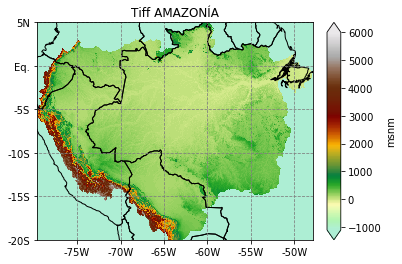

In [41]:
ds = salem.open_xr_dataset(fpath)
hmap = ds.salem.get_map(cmap='topo', vmin=-1100, vmax= 6000)
hmap.set_data(ds['data']) # crs=None, interp='nearest'
hmap.visualize(title= 'Tiff AMAZONÍA',cbar_title='msnm');

In [42]:
# psrs = 'epsg:32630'  # http://spatialreference.org/ref/epsg/wgs-84-utm-zone-30n/
# ds.attrs['pyproj_srs'] = psrs

## Proyección personalizada
Alternativamente, Salem comprenderá cualquier proyección compatible con pyproj . [buscar proyeccion](https://spatialreference.org/ref/epsg/4326/)

La información del proyecto debe proporcionarse como atributo:

C:\Users\manuel\Anaconda3\envs\pangeo\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


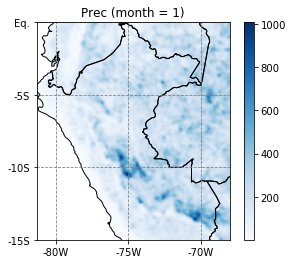

In [43]:
dsx= Pisco_clima.sel(month=1)
psrs = 'epsg:4326' #32718 3448
dsx.attrs['pyproj_srs'] = psrs
#dsx.set_data(dsx['Prec'])
dsx.Prec.salem.quick_map(interp='linear', cmap='Blues');

## Reproyección de datos 
Puede reproyectar un conjunto de datos en otro con la transform() función:

C:\Users\manuel\Anaconda3\envs\pangeo\lib\site-packages\xarray\core\nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


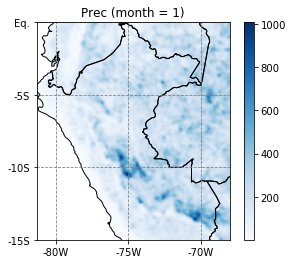

In [44]:
# reproyectando datos de dsx(wgs 84) to ds(epsg:4326)
# new_path+new_file= 'M:\\data_PISCO\\merge_pisco\\PiscoV2p1_stable_monthly_start.nc'
ds_x= salem.open_xr_dataset(new_path+new_file)
ds_xr = dsx.salem.transform(ds_x)
ds_xr
ds_xr.Prec.groupby('time.month').mean(dim='time').sel(month=1).salem.quick_map(interp='linear', cmap='Blues');

Actualmente, salem implementa, el vecino más próximo (predeterminado), los métodos de interpolación lineal y spline:

C:\Users\manuel\Anaconda3\envs\pangeo\lib\site-packages\xarray\core\nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


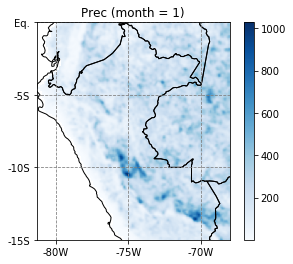

In [45]:
ds_xr = dsx.salem.transform(ds_x)
ds_xr.Prec.groupby('time.month').mean(dim='time').sel(month=1).salem.quick_map(interp='spline', cmap= 'Blues');

## Subssetting data 
La subset() función le permite subconjuntar sus conjuntos de datos de acuerdo con datos vectoriales o ráster (georreferenciados), por ejemplo, basados en geometrías bien formadas (por ejemplo, polígonos), otras cuadrículas o archivos de formas:

C:\Users\manuel\Anaconda3\envs\pangeo\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


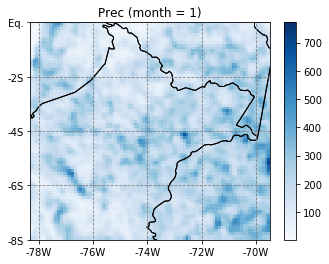

In [46]:
# M:\\data_GIS\\dep_peru\\Base_Regional_rep.shp
shdf = salem.read_shapefile('..\\Data\\shps\\Base_Regional_rep.shp')
shdf = shdf.loc[shdf['NOMBDEP'] == 'LORETO']  # remove other deps
ds_xr2 = ds_xr.salem.subset(shape=shdf, margin=5) # add or delete pixeles a los limites
#I am densified (external_values, 1 elements)
ds_xr2.Prec.groupby('time.month').mean(dim='time').sel(month=1).salem.quick_map(cmap= 'Blues')

C:\Users\manuel\Anaconda3\envs\pangeo\lib\site-packages\xarray\core\nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


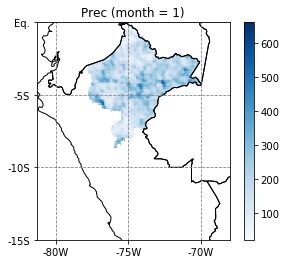

In [47]:
# shdf = salem.read_shapefile('M:\\data_GIS\\dep_peru\\Loreto.shp')
# M:\\data_GIS\\shps_amazonbasin\\Tamshiyacu_Amazonas.shp
ds_xr3 = ds_xr.salem.roi(shape=shdf)
#I am densified (external_values, 1 elements)
ds_xr3.Prec.groupby('time.month').mean(dim='time').sel(month=1).salem.quick_map(cmap= 'Blues')

# ESTACIONES SEMAMI

In [50]:
est_senamhi= dict({'ESTACION':['BORJA', 'NAMBALLE', 'CHIRIACO'], 
 'DEPARTAMENTO':['LORETO', 'CAJAMARCA', 'CHIRIACO'],
 'PROVINCIA':['ALTO AMAZONAS', 'SAN IGNACIO', 'BAGUA'],
 'DISTRITO':['MANSERICHE', 'NAMBALLE', 'IMAZA'],
 'LATITUD':['4 27 1 S', '4 59 58.29 S', '5 9 41.2 S'],
 'LONGITUD':['77 27 1 W', '795 19.03 W', '78 17 17 W'],
 'ALTITUD':['450 MSNM', '722 MSNM', '323 MSNM'],
 'TIPO':['CONVENCIONAL METEOROLOGICA', 'CONVENCIONAL METEOROLOGICA', 'CONVENCIONAL METEOROLOGICA'],
 'CODIGO':[104061, 105107, 105104]
})

In [51]:
df_est= pd.DataFrame(est_senamhi)
df_est.set_index('ESTACION')

,DEPARTAMENTO,PROVINCIA,DISTRITO,LATITUD,LONGITUD,ALTITUD,TIPO,CODIGO
ESTACION,,,,,,,,
BORJA,LORETO,ALTO AMAZONAS,MANSERICHE,4 27 1 S,77 27 1 W,450 MSNM,CONVENCIONAL METEOROLOGICA,104061
NAMBALLE,CAJAMARCA,SAN IGNACIO,NAMBALLE,4 59 58.29 S,795 19.03 W,722 MSNM,CONVENCIONAL METEOROLOGICA,105107
CHIRIACO,CHIRIACO,BAGUA,IMAZA,5 9 41.2 S,78 17 17 W,323 MSNM,CONVENCIONAL METEOROLOGICA,105104


In [52]:
metadata = pd.read_csv('..\\Data\\metadata_senamhi.csv')
metadata.set_index('NOMBRE').head()

,LONGITUD,LATITUD,CODIGO,CATEGORIA,ICO,ESTADO,COD_OLD,ALTITUD,FECHA_INICIO,FECHA_FIN
NOMBRE,,,,,,,,,,
MONTE GRANDE,-79.15323,-7.22499,100090,CO,M,DIFERIDO,396.0,431,201402,201907
QUEROCOTILLO,-79.03696,-6.27366,106067,PLU,M,DIFERIDO,153109.0,1970,201409,201908
PUENTE MAYGASBAMBA,-78.52437,-6.67411,221110,HLG,H,DIFERIDO,220307.0,2551,201205,201906
QUEBRADA SHUGAR,-78.45694,-6.68778,100113,PLU,M,DIFERIDO,153108.0,3292,201402,201908
CHUGUR,-78.73717,-6.67091,106077,PLU,M,DIFERIDO,153208.0,2757,201405,201907


In [53]:
metadata[ metadata['NOMBRE'] == 'BORJA']

,LONGITUD,LATITUD,NOMBRE,CODIGO,CATEGORIA,ICO,ESTADO,COD_OLD,ALTITUD,FECHA_INICIO,FECHA_FIN
158,-77.45028,-4.45028,BORJA,104061,PLU,M,DIFERIDO,270.0,450,197810,201901
159,-77.54800,-4.47000,BORJA,220107,HLM,H,DIFERIDO,220107.0,152,201209,201905


In [54]:
Borja= pd.read_csv('..\\Data\\104061.csv', sep=';', parse_dates=['FECHA'])
Borja.drop('Unnamed: 0', axis=1, inplace=True)
Borja.head()
#Borja.dtypes

,FECHA,TMAX,TMIN,HR,PP
0,1978-10-01,28.0,21.6,94.9,0.0
1,1978-10-02,28.2,21.4,96.8,0.0
2,1978-10-03,26.2,19.8,96.2,0.0
3,1978-10-04,27.0,21.0,96.2,0.0
4,1978-10-05,26.2,20.8,95.6,0.0


In [55]:
mask = (Borja['FECHA'] > '2011-01-01') & (Borja['FECHA'] <= '2014-12-31')
Borja.loc[mask].head()

,FECHA,TMAX,TMIN,HR,PP
365,2011-03-01,NaN,NaN,NaN,6.5
366,2011-03-02,NaN,NaN,NaN,16.8
367,2011-03-03,NaN,NaN,NaN,45.0
368,2011-03-04,NaN,NaN,NaN,43.5
369,2011-03-05,NaN,NaN,NaN,2.0


In [56]:
Borja.loc[mask].tail()

,FECHA,TMAX,TMIN,HR,PP
1805,2014-11-27,NaN,NaN,NaN,5.5
1806,2014-11-28,NaN,NaN,NaN,18.0
1807,2014-11-29,NaN,NaN,NaN,73.8
1808,2014-11-30,NaN,NaN,NaN,14.5
1809,2014-12-01,NaN,NaN,NaN,0.0


C:\Users\manuel\Anaconda3\envs\pangeo\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


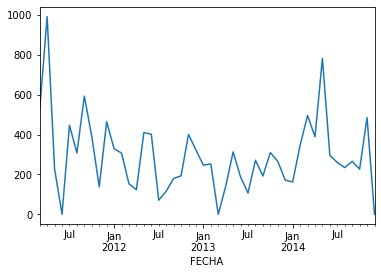

In [57]:
s_Borja= pd.Series(data=Borja.loc[mask]['PP'].values, index=Borja.loc[mask]['FECHA'])
s_Borja.head()
s_Borja_r= s_Borja.resample('m', how='sum') # falta mejorar tenia sueño
s_Borja_r.plot(kind='line')

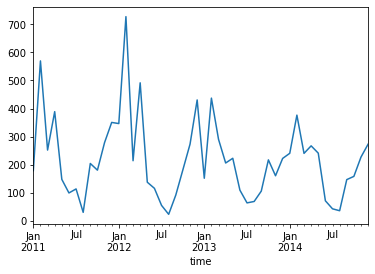

In [58]:
# -77.45028	-4.45028
Pisco_Borja= Piscopm_all.sel(time= slice('2011-01-01',  '2014-12-31')).sel(lon=-77.45028, method='nearest').sel(lat=-4.45028, method='nearest')
df_pp_pisco= Pisco_Borja.to_dataframe()
df_pp_pisco.Prec.plot()

## Prom areal

In [59]:
#A AREA DE ESTUDIO
lat_n= -1; lat_s= -6; lon_w= -79; lon_e= -75

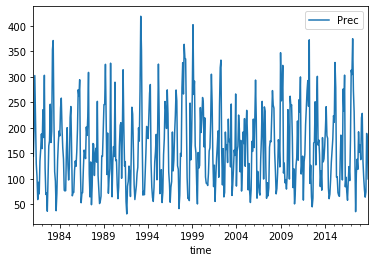

In [60]:
Piscopm_all_ta= Piscopm_all.sel(time= slice(date_clim_ini.strftime('%Y-%m-%d'), date_clim_fin.strftime('%Y-%m-%d')), lon=slice(lon_w, lon_e), lat=slice(lat_n, lat_s))
pp_pisco= Piscopm_all_ta.Prec.mean(dim=('lat','lon'))
df_pp_pisco= pp_pisco.to_dataframe()
df_pp_pisco.plot()

# FALTA TRABAJAR
- CBAR
- https://plot.ly/python/county-choropleth/
- https://nordicesmhub.github.io/GEO4962/04-tools/index.html